# Library Module - Crossref API

Welcome! In this module, we'll be introducing you to the online computing environment of Jupyter Notebooks, and giving an introduction to the Crossref API.


## Table of Contents
[1. Introduction](#1)
   - [1.1 Installing Packages](#1.1)
   - [1.2 Introduction to Jupyter Notebook](#1.2)
   - [1.3 Introduction to Python](#1.3)
   
[2. Analysis using Crossref API](#2)
   - [2.1 What is Crossref?](#2.1)
   - [2.2 Packages for Crossref](#2.2)
   - [2.3 Exploring the Data](#2.3)
   - [2.4 Keys, Indexes, Metadata](#2.4)
   - [2.5 Creating tables](#2.5)
   - [2.6 Searches](#2.6)
   
[3. Visualization](#3)
   - [3.1 Grouping and Sorting by Journal](#3.1)
   - [3.2 Bar Charts](#3.2)
   - [3.3 Citations](#3.3)
   - [3.4 Queries over Time](#3.4)
       
[4. Conclusion](#4)
   
[Bibliography](#5)


# Introduction <a id = '1'></a>

Welcome to the notebook! This notebook is an introduction to Python and the CrossRef API, giving us access to over 80 million journal articles.

# Learning Outcomes
**By the end of this notebook, students should be able to:**
- Use scaffolded Python code in the provided Jupyter notebook template to make Crossref subject and author queries
- Extract reference information from Crossref query results
- Visualize Crossref query results in bar plots and line plots. Interpret distributions and trends over time found in results
- Compare results from two different keyword queries	
- Explore/Discover new research directions

# 1.1 Installing Packages <a id = '1.1'></a>

There is a lot of code that exists out there that other people have written, and packages are a way for us to use their code without having to rewrite it. In the cell below, we install some packages that will be useful to us as we expore the Crossref API.

In [1]:
# just run this cell

from collections import Counter # for easy counting
import ast # for string to dictionary conversion
import pandas as pd # for data manipulation
import numpy as np # for array manipulation
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline 

# 1.2 Introduction to Jupyter Notebook <a id = '1.2'></a>
Running Cells, Editing the Notebook

Jyputer notebooks are a type of online interactive computing environment composed of code and text cells. Notebooks contain a mixture of markdown and code cells to break down the activity into more manageable pieces.


### Creating Cells
To add a cell to the notebook, click the "+" in the top left area right under "File". 

Within a cell, you have the option to write code, create a heading, or write text. To select an option, click on the "Code" button, located on the same row as "+". You will see a menu of options to choose from. 


Markdown - use for text
<br>
Code - use for running code
<br>
Heading - use for titles

### Deleting Cells
To delete a cell, click on the cell, and click the **scissors** icon to the right of the "+".

### Saving Your Work
To save your work, click on "File", then "Save and Checkpoint". If you have a Mac, you can click **"Command + S"**. 

For this notebook, you only need to know how to run, edit and create cells. However, for more assistance with navigating Jupyter Notebook, click on the **keyboard** icon next to the cell drop-down menu.

For more help, here's a great cheat sheet: https://i.pinimg.com/originals/f5/7e/07/f57e074be4503a39f6d9d8d15f0e8aa5.png

# Introduction to Python <a id = '1.3'></a>
Python is a programming language applied very frequently in data science. In the first part of this notebook, we will give a brief overview of Python.

### Variables
A name that is used to denote something or a value is called a `variable`. In python, variables can be declared and values can be assigned to them. Values can include numbers and strings. Run the code below:

In [2]:
x = 5
y = 2
hi = "Hello World"

Because the above cell ran, we've now officially assigned the variables to values. Run the cell (Shift + Enter) below to see the output of `x`, `hi`, and `print (x+y)`. Running the cell tells our computer to treat those symbols as the given values. If you didn't run the cell above, python wouldn't recognize the variables below.

In [3]:
x

5

In [4]:
hi

'Hello World'

In [5]:
print (x + y)

7


# 2. Analysis using Crossref API <a id = '2'></a>
The main goal of this notebook is to give an introduction to Crossref. In the sections below, we walk through the basics of Crossref

# 2.1 What is Crossref? <a id = '2.1'></a>

Crossref is a non-profit organization that helps to provides access to scientific literature. According to their [website itself](https://www.crossref.org/), Crossref "makes research outputs easy to find, cite, link, and assess". 

Crossref data on scientific publications essentially consists of three elements:
<br>
    1) Metadata about a publication
    <br>
    2) A URL link to the article
    <br>
    3) A document identifier (doi)
    <br>
    
At present Crossref contains information on 80 million scientific publications including articles, books and book chapters.

Data can be accessed using the python packages `habanero`, `crossrefapi`, and `crossref-commons`. In this module, we'll be focusing on the functionality of the **habanero** package. 

# 2.2 Packages for Crossref <a id = '2.2'></a>

When importing a package into Jupyter Notebook, we use the command `pip install ...` to download a package into Jupyter Notebook. 

We then use the command `import (package name)` to use our new package in our code. 

In [6]:
!pip install habanero

In [7]:
#To use Crossref API in Python, we need to import the habanero package
import habanero
from habanero import Crossref

# 2.3 Exploring the Data <a id = '2.3'></a>
In the cells below, we walk through using Crossref and exploring the data it gives us. To create an object that takes on the Crossref identity, we assign it to the variable `cr`.

In [8]:
cr = Crossref() # create a crossref object

The main function we will use is called `cr.works()`. This function takes in a query name. As an example, we'll use the search term "kenya". In order to save this output, we'll assign it to the variable name `kenya`.

In [9]:
# query for the term "kenya"
kenya = cr.works(query = "kenya")

If we inspect `kenya`, we can see that it is a dictionary.

In [10]:
type(kenya)

dict

In [11]:
kenya

{'status': 'ok',
 'message-type': 'work-list',
 'message-version': '1.0.0',
 'message': {'facets': {},
  'total-results': 42723,
  'items': [{'indexed': {'date-parts': [[2020, 4, 10]],
     'date-time': '2020-04-10T22:00:11Z',
     'timestamp': 1586556011959},
    'reference-count': 0,
    'publisher': 'Centro Internacional de Agricultura Tropical',
    'issue': '1',
    'content-domain': {'domain': [], 'crossmark-restriction': False},
    'short-container-title': ['Trop Grass - Forr Trop'],
    'DOI': '10.17138/tgft(2)100-102',
    'type': 'journal-article',
    'created': {'date-parts': [[2015, 4, 1]],
     'date-time': '2015-04-01T16:32:16Z',
     'timestamp': 1427905936000},
    'page': '100',
    'source': 'Crossref',
    'is-referenced-by-count': 0,
    'title': ['Production of giant Panicum in semi-arid Kenya'],
    'prefix': '10.17138',
    'volume': '2',
    'author': [{'given': 'Donald M.G.',
      'family': 'Njarui',
      'sequence': 'first',
      'affiliation': []},
     

In the cell below, try creating your own query for a different search term. Make sure to save it to a variable! For now, limit your search term to a single word.

In [ ]:
# your query here
query = cr.works(query = "...")

In [12]:
# example
query = cr.works(query='berkeley')

 # 2.4 Keys, Indexes, Metadata <a id = '2.4'></a>
 A dictionary is a type of data structure that is indexed by keys. A dictionary contains key-value pairs, and we can access the values by calling on the keys. In our `kenya` dictionary, we can inspect the keys and take a look at the values that it contains.

In [13]:
list(kenya.keys())

['status', 'message-type', 'message-version', 'message']

Above, we can see that there are 4 different keys in our `kenya` dictionary. Let's see what the values are for each of the keys. In the cells below, we are accessing the values by *indexing* into the dictionary by the given keys.

In [14]:
kenya['status']

'ok'

In [15]:
kenya['message-type']

'work-list'

In [16]:
kenya['message-version']

'1.0.0'

In [17]:
kenya['message']

{'facets': {},
 'total-results': 42723,
 'items': [{'indexed': {'date-parts': [[2020, 4, 10]],
    'date-time': '2020-04-10T22:00:11Z',
    'timestamp': 1586556011959},
   'reference-count': 0,
   'publisher': 'Centro Internacional de Agricultura Tropical',
   'issue': '1',
   'content-domain': {'domain': [], 'crossmark-restriction': False},
   'short-container-title': ['Trop Grass - Forr Trop'],
   'DOI': '10.17138/tgft(2)100-102',
   'type': 'journal-article',
   'created': {'date-parts': [[2015, 4, 1]],
    'date-time': '2015-04-01T16:32:16Z',
    'timestamp': 1427905936000},
   'page': '100',
   'source': 'Crossref',
   'is-referenced-by-count': 0,
   'title': ['Production of giant Panicum in semi-arid Kenya'],
   'prefix': '10.17138',
   'volume': '2',
   'author': [{'given': 'Donald M.G.',
     'family': 'Njarui',
     'sequence': 'first',
     'affiliation': []},
    {'given': 'Mwangi',
     'family': 'Gatheru',
     'sequence': 'additional',
     'affiliation': []},
    {'given

This dictionary is nested, meaning that we can have keys that lead to values which are more dictionaries. It seems like the `message` contains most of the information we're interested in. Below, take a look at the keys of the `message` component of the `kenya` dictionary.

In [18]:
list(kenya['message'].keys()) # keys of the kenya message dictionary

['facets', 'total-results', 'items', 'items-per-page', 'query']

Just as we did before, we can inspect what information is contained for each key of the dictionary.

In [19]:
kenya['message']['facets'] # there are no facets; it's an empty set

{}

In [20]:
# This tells us the total number of results from our query
kenya['message']['total-results']

42723

In [21]:
kenya['message']['items-per-page'] # tells us how many items per page 

20

In [22]:
kenya['message']['query'] # details about our query

{'start-index': 0, 'search-terms': 'kenya'}

In [23]:
kenya['message']['items'] # the items of our query

[{'indexed': {'date-parts': [[2020, 4, 10]],
   'date-time': '2020-04-10T22:00:11Z',
   'timestamp': 1586556011959},
  'reference-count': 0,
  'publisher': 'Centro Internacional de Agricultura Tropical',
  'issue': '1',
  'content-domain': {'domain': [], 'crossmark-restriction': False},
  'short-container-title': ['Trop Grass - Forr Trop'],
  'DOI': '10.17138/tgft(2)100-102',
  'type': 'journal-article',
  'created': {'date-parts': [[2015, 4, 1]],
   'date-time': '2015-04-01T16:32:16Z',
   'timestamp': 1427905936000},
  'page': '100',
  'source': 'Crossref',
  'is-referenced-by-count': 0,
  'title': ['Production of giant Panicum in semi-arid Kenya'],
  'prefix': '10.17138',
  'volume': '2',
  'author': [{'given': 'Donald M.G.',
    'family': 'Njarui',
    'sequence': 'first',
    'affiliation': []},
   {'given': 'Mwangi',
    'family': 'Gatheru',
    'sequence': 'additional',
    'affiliation': []},
   {'given': 'David M.',
    'family': 'Mwangi',
    'sequence': 'additional',
    'aff

Above, we can see that the `items` contains the majority of information about our query on Kenya. It contains a list of all of the results - we can check this with the `type` command we used earlier. Since we only are looking at the first page, our items list has only 20 items in it.

In [24]:
type(kenya['message']['items'])

list

In [25]:
len(kenya['message']['items'])

20

# 2.5 Creating Tables <a id = '2.5'></a>
When our data exists in dictionaries, it's a little hard to explore and manipulate. In order to tackle this, we'll create a dataframe of the information so that we can access it more easily.

In [26]:
df_kenya = pd.DataFrame(kenya['message']['items'])
df_kenya.head() # show the first 5 rows

,indexed,reference-count,publisher,issue,content-domain,short-container-title,DOI,type,created,page,...,published-print,link,editor,ISBN,original-title,abstract,license,update-policy,subtitle,assertion
0,"{'date-parts': [[2020, 4, 10]], 'date-time': '...",0,Centro Internacional de Agricultura Tropical,1,"{'domain': [], 'crossmark-restriction': False}",[Trop Grass - Forr Trop],10.17138/tgft(2)100-102,journal-article,"{'date-parts': [[2015, 4, 1]], 'date-time': '2...",100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'date-parts': [[2020, 3, 24]], 'date-time': '...",0,De Gruyter,NaN,"{'domain': [], 'crossmark-restriction': False}",NaN,10.1515/9783110826050-068,book-chapter,"{'date-parts': [[2019, 2, 25]], 'date-time': '...",304-305,...,"{'date-parts': [[1972, 12, 31]]}",[{'URL': 'http://www.degruyter.com/view/books/...,"[{'given': 'Werner', 'family': 'Schuder', 'seq...",[9783110826050],NaN,NaN,NaN,NaN,NaN,NaN
2,"{'date-parts': [[2020, 4, 26]], 'date-time': '...",0,"Nature Kenya, East Africa Natural History Soci...",NaN,"{'domain': [], 'crossmark-restriction': False}",NaN,10.5962/bhl.title.87589,monograph,"{'date-parts': [[2014, 8, 24]], 'date-time': '...",NaN,...,{'date-parts': [[1999]]},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"{'date-parts': [[2020, 3, 30]], 'date-time': '...",0,International Journal Of Advanced Research,2,"{'domain': [], 'crossmark-restriction': False}",[IJAR],10.21474/ijar01/6544,journal-article,"{'date-parts': [[2018, 3, 30]], 'date-time': '...",1195-1203,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{'date-parts': [[2020, 3, 24]], 'date-time': '...",0,Commonwealth Secretariat,NaN,"{'domain': [], 'crossmark-restriction': False}",NaN,10.14217/9781848594371-12-en,component,"{'date-parts': [[2016, 1, 29]], 'date-time': '...",NaN,...,"{'date-parts': [[1987, 12, 1]]}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are a bunch of columns in our table, and we can't see all of them by scrolling. Below, we can look at a list of the columns instead.

In [27]:
df_kenya.columns

Index(['indexed', 'reference-count', 'publisher', 'issue', 'content-domain',
       'short-container-title', 'DOI', 'type', 'created', 'page', 'source',
       'is-referenced-by-count', 'title', 'prefix', 'volume', 'author',
       'member', 'published-online', 'container-title', 'language',
       'deposited', 'score', 'issued', 'references-count', 'journal-issue',
       'alternative-id', 'URL', 'ISSN', 'issn-type', 'publisher-location',
       'isbn-type', 'published-print', 'link', 'editor', 'ISBN',
       'original-title', 'abstract', 'license', 'update-policy', 'subtitle',
       'assertion'],
      dtype='object')

We want to be able to retrieve more data from CrossRef. A single CrossRef query can return up to 1,000 results, and since our query has over 42,000 total results, we'd need to make 43 queries. Remember at the beginning, we only had 20 results since we only grabbed the first page. The CrossRef API permits fetching results from multiple pages, so by setting `cursor` to `*` and `cursor_max` to 1000 we can grab 1000 queries at once. Querying all 42,000 results would take a long time, so for the purposes of this demonstration we are only using 1000. If you have more time, you could query more results, but be aware that it will take a long time.

In [28]:
# this cell will take a while to run
cr_kenya = cr.works(query="kenya", cursor = "*", cursor_max = 1000, progress_bar = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 49/49 [01:06<00:00,  1.35s/it]


We can check that we have the 1,000 messages, and indeed we do.

In [29]:
sum([len(k['message']['items']) for k in cr_kenya])

1000

Remember before, when you created your own search query? Here, we'll go through a few steps to get more results for your query. First, we'll check how many total results your query has. Run the cell below to find out.

In [30]:
query['message']['total-results']

27689

If there are fewer than 1000 results, then set `cursor_max` to the number of results. If there are more than 1000 results, set `cursor_max` to 1000 so that the code won't take too long to run. Be sure to fill in `query` with the same search term you used earlier.

In [ ]:
cr_query = cr.works(query="...", cursor = "*", cursor_max = 1000, progress_bar = True)

In [32]:
# example
cr_query = cr.works(query="berkeley", cursor = "*", cursor_max = 1000, progress_bar = True)

100%|██████████████████████████████████████████████████████████████████████████████████| 49/49 [00:52<00:00,  1.06s/it]


In order to get all of the different results from our Kenya query, we need to extract them from `cr_kenya`. Below, we create a list where each element is one result. `cr_kenya` is a list consisting of pages, where we have 20 results per page. So `cr_kenya` has 50 pages of 20 results each, giving us our 1000 results. In order to extract the info and have a list with each element be one results, we need to do some data manipulation.

In [33]:
len(cr_kenya)

50

In the cell below, we have 2 list comprehensions to get the results from our query. The first one creates a length 50 list that contains only the items instead of the entire dictionary, for each of the 50 pages. The second list comprehension extracts all of the items from the nested lists so that we have a single 1000 item list where each element is one result.

In [34]:
kenya_items = [k['message']['items'] for k in cr_kenya] # get items for all pages
kenya_items = [item for sublist in kenya_items for item in sublist] # restructure list

We'll do the same for your query results so that you can have some fun plotting later in the notebook. Just run the cell below.

In [35]:
query_items = [k['message']['items'] for k in cr_query] # get items for all pages
query_items = [item for sublist in query_items for item in sublist] # restructure list

# 2.6 Searches <a id = '2.6'></a>
You may be curious about the `cr.works` function that we've been using to get our data. This is the function that processes your topical "search". There are different arguments, and we've seen how changing these arguments can help us get more search results than just the first 20. 

Also, before we asked you to limit your search term to a single word. This is not a hard restriction - we did this for simplicity. You can query terms that are more specific and include more words - try it out below! Keep in mind that the more specific your search query, the fewer results you may see. Feel free to play around with it.

In [36]:
query2 = cr.works(query = 'labrador retriever') # searching for labrador retriever
query2['message']['total-results']

7999

# 3. Visualization <a id = '3'></a>
Visualization is an important part of data analysis. Rather than looking at dictionaries and dataframes, we can see a visual summary of our data. In this section, we'll go over different types of visualizations we can make based off of the different data we have. We'll start by looking at the publishers. But first, we need to do some wrangling to get the data in a form that's useful for us.

# 3.1 Grouping and Sorting by Journal <a id = '3.1'></a>
Remember in [section 2.5](#2.5), we took our query results and converted them from a dictionary to a dataframe. Below, we will do this for our list of 1000 `kenya_items`, and then we can use the dataframe methods of grouping and sorting to get the counts of articles published by each publisher. We can also group by other columns, such as `type` or `language`.

In the cell below, we create a dataframe containing all 1000 of our Kenya query results.

In [37]:
kenya_df = pd.DataFrame(kenya_items)
kenya_df.head()

,indexed,reference-count,publisher,issue,license,content-domain,short-container-title,published-print,DOI,type,...,posted,group-title,subtype,archive,accepted,edition-number,original-title,update-to,institution,content-created
0,"{'date-parts': [[2019, 11, 19]], 'date-time': ...",17,Wiley,1,[{'URL': 'http://doi.wiley.com/10.1002/tdm_lic...,"{'domain': [], 'crossmark-restriction': False}",[Trop Med Int Health],"{'date-parts': [[2003, 1]]}",10.1046/j.1365-3156.2003.00987.x,journal-article,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'date-parts': [[2019, 11, 20]], 'date-time': ...",0,Informa UK Limited,2,NaN,"{'domain': [], 'crossmark-restriction': False}","[Geografiska Annaler. Series B, Human Geography]",{'date-parts': [[1984]]},10.2307/490722,journal-article,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"{'date-parts': [[2019, 11, 20]], 'date-time': ...",0,Springer Science and Business Media LLC,6,NaN,"{'domain': [], 'crossmark-restriction': False}",[Clays and Clay Minerals],{'date-parts': [[1986]]},10.1346/ccmn.1986.0340607,journal-article,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"{'date-parts': [[2019, 11, 20]], 'date-time': ...",0,Springer Science and Business Media LLC,3,"[{'URL': 'http://www.springer.com/tdm', 'start...","{'domain': [], 'crossmark-restriction': False}",[Bull. Geodesique],"{'date-parts': [[1985, 9]]}",10.1007/bf02520335,journal-article,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{'date-parts': [[2019, 11, 20]], 'date-time': ...",24,Springer Science and Business Media LLC,2-3,"[{'URL': 'http://www.springer.com/tdm', 'start...","{'domain': [], 'crossmark-restriction': False}",[Nutr Cycl Agroecosyst],"{'date-parts': [[2007, 2, 20]]}",10.1007/s10705-006-9060-8,journal-article,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


While we are at it, we'll convert your search query items into a data frame as well. Adapt the code in the cell to create a dataframe out of your `query_items` list.

In [ ]:
query_df = pd.DataFrame(...)
query_df.head()

In [38]:
# example
query_df = pd.DataFrame(query_items)
query_df.head()

,indexed,reference-count,publisher,issue,license,content-domain,short-container-title,published-print,DOI,type,...,article-number,editor,subtitle,event,posted,group-title,accepted,subtype,original-title,edition-number
0,"{'date-parts': [[2019, 11, 20]], 'date-time': ...",10,Wiley,2,[{'URL': 'http://doi.wiley.com/10.1002/tdm_lic...,"{'domain': [], 'crossmark-restriction': False}",[J. Soc. Inf. Display],{'date-parts': [[2009]]},10.1889/jsid17.2.71,journal-article,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'date-parts': [[2019, 11, 20]], 'date-time': ...",7,Wiley,2,[{'URL': 'http://doi.wiley.com/10.1002/tdm_lic...,"{'domain': [], 'crossmark-restriction': False}",[J. Soc. Inf. Display],{'date-parts': [[2009]]},10.1889/jsid17.2.87,journal-article,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"{'date-parts': [[2019, 11, 21]], 'date-time': ...",0,SAGE Publications,2,[{'URL': 'http://journals.sagepub.com/page/pol...,"{'domain': [], 'crossmark-restriction': False}",[Journal of Consumer Culture],"{'date-parts': [[2007, 7]]}",10.1177/14695405070070020604,journal-article,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"{'date-parts': [[2019, 11, 21]], 'date-time': ...",0,Office of Scientific and Technical Information...,NaN,NaN,"{'domain': [], 'crossmark-restriction': False}",NaN,NaN,10.2172/5918970,report,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{'date-parts': [[2019, 11, 22]], 'date-time': ...",2,Wiley,3,[{'URL': 'http://doi.wiley.com/10.1002/tdm_lic...,"{'domain': [], 'crossmark-restriction': False}",[J. Hist. Behav. Sci.],NaN,10.1002/jhbs.20447,journal-article,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Another useful way to search for articles is by the journal title. In our dataframe, this information is stored in the column `containter-title`, which contains the journal titles as a list. Unfortunately, we cannot group by `container-title` since the items are lists. However, we've created a function defined below, called `add_journal_title`, which adds a new column, `journal-title`, containing the journal title as a string so that we can group by it. Run the cell below to define the function.

In [39]:
def add_journal_titles(df):
    """Adds a column containing the journal title as a string, rather than a list, to allow for grouping.
    Journal title is referred to as 'container-title', and the input dataframe must have a column of this name.
    
    Argument:
    df, an DataFrame created from a Crossref query"""
    
    journal_titles = []
    for i in range(len(df)): # iterate through all entries
        if df['container-title'].isna()[i]: # handle NaN cases
            journal_titles.append(np.nan)
        else:
            journal_titles.append(df['container-title'][i][0])
            
    df = df.copy() # copy dataframe
    df['journal-title'] = journal_titles # add column to dataframe
    
    return df

Now that we have the function defined, we can apply it to our `kenya_df` and your `query_df`. Run the cell below to do this. If you scroll to the right, you'll see the column `journal-title` added at the end!

In [40]:
kenya_df = add_journal_titles(kenya_df)
query_df = add_journal_titles(query_df)
query_df.head()

,indexed,reference-count,publisher,issue,license,content-domain,short-container-title,published-print,DOI,type,...,editor,subtitle,event,posted,group-title,accepted,subtype,original-title,edition-number,journal-title
0,"{'date-parts': [[2019, 11, 20]], 'date-time': ...",10,Wiley,2,[{'URL': 'http://doi.wiley.com/10.1002/tdm_lic...,"{'domain': [], 'crossmark-restriction': False}",[J. Soc. Inf. Display],{'date-parts': [[2009]]},10.1889/jsid17.2.71,journal-article,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Journal of the Society for Information Display
1,"{'date-parts': [[2019, 11, 20]], 'date-time': ...",7,Wiley,2,[{'URL': 'http://doi.wiley.com/10.1002/tdm_lic...,"{'domain': [], 'crossmark-restriction': False}",[J. Soc. Inf. Display],{'date-parts': [[2009]]},10.1889/jsid17.2.87,journal-article,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Journal of the Society for Information Display
2,"{'date-parts': [[2019, 11, 21]], 'date-time': ...",0,SAGE Publications,2,[{'URL': 'http://journals.sagepub.com/page/pol...,"{'domain': [], 'crossmark-restriction': False}",[Journal of Consumer Culture],"{'date-parts': [[2007, 7]]}",10.1177/14695405070070020604,journal-article,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Journal of Consumer Culture
3,"{'date-parts': [[2019, 11, 21]], 'date-time': ...",0,Office of Scientific and Technical Information...,NaN,NaN,"{'domain': [], 'crossmark-restriction': False}",NaN,NaN,10.2172/5918970,report,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{'date-parts': [[2019, 11, 22]], 'date-time': ...",2,Wiley,3,[{'URL': 'http://doi.wiley.com/10.1002/tdm_lic...,"{'domain': [], 'crossmark-restriction': False}",[J. Hist. Behav. Sci.],NaN,10.1002/jhbs.20447,journal-article,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Journal of the History of the Behavioral Sciences


Now, back to grouping. We can use grouping in our dataframe in order to get the counts of articles published by each journal. The `count()` argument gets us the counts for each publisher, and taking the column `'indexed'` gives us a single column containing the counts. Theoretically, we could take any of the columns, since they all contain the same values. We take the 'indexed' column, since it is not likely to have any missing values. The command `reset_index()` turns gives us back a dataframe instead of a series.

In [41]:
kenya_publisher_counts = kenya_df.groupby('publisher').count()['indexed'].reset_index()
kenya_publisher_counts = kenya_publisher_counts.rename({'indexed':'count'}, axis = 1) # rename counts column
kenya_publisher_counts

,publisher,count
0,AOSIS,1
1,ASMEDC,2
2,Academic Journals,2
3,Academic Research Publishing Group,1
4,Academy of Science of South Africa,1
...,...,...
159,WHO Press,1
160,Wageningen Environmental Research,2
161,Walter de Gruyter GmbH,1
162,Wiley,96


The `kenya_publisher_counts` dataframe above shows us that we have 44 different publishers, and a lot of them published only a few articles. In order to see which publishers had the most articles, we can sort our dataframe by count.

In [42]:
sorted_kenya_publisher_counts = kenya_publisher_counts.sort_values(by='count', ascending = False)
sorted_kenya_publisher_counts

,publisher,count
45,Elsevier BV,161
143,Springer Science and Business Media LLC,103
162,Wiley,96
121,Richtmann Publishing,75
65,Informa UK Limited,63
...,...,...
63,Ilia State University,1
61,IOR Press,1
58,Hart Publishing,1
56,Greener Journals,1


# 3.2 Bar Charts <a id = '3.2'></a>
Now that we have a sorted dataframe with publishers and the number of articles they each published on Kenya, we can use this dataframe to plot the publishers with the 10 highest counts.

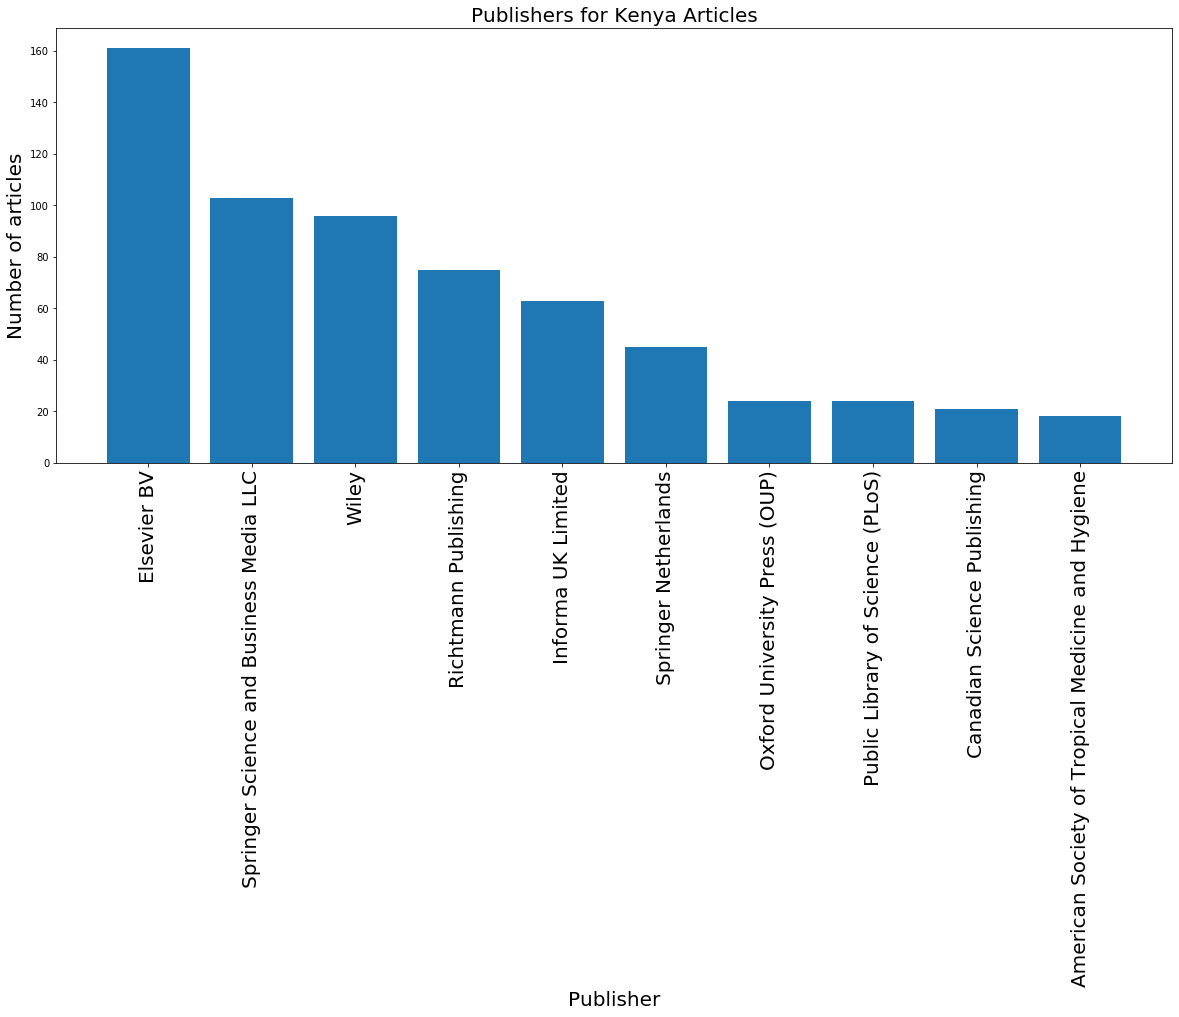

In [43]:
kenya_publishers_top10 = sorted_kenya_publisher_counts.head(10) # get first 10 publishers

plt.figure(figsize=(20,8)) # set figure size

# create bar plot with publishers and counts
plt.bar(kenya_publishers_top10['publisher'], kenya_publishers_top10['count']) 

# rotate publisher names for readability
plt.xticks(kenya_publishers_top10['publisher'], rotation='vertical', fontsize = 20) 

# labeling
plt.title('Publishers for Kenya Articles', fontsize = 20) # set title
plt.xlabel('Publisher', fontsize = 20) # set x label
plt.ylabel('Number of articles', fontsize = 20); # set y label

Before, we grouped by publisher. Keep in mind that we can group by other tags as well, such as type of article (`type`), the language the article was published in (`language`), or the journal the article is from(`journal-title`). In the cell below, choose to group by either `type` or `language` or `journal-title` and plot the resulting bar chart. Remember to sort your dataframe as well.

Note: If you choose to plot the journal titles, you may want to limit your bar chart to the 10 most common journals in order to keep the chart readable. Take a look above at how we created `kenya_publishers_top10` to see how to select the top 10 most common items from a sorted dataframe.

In [ ]:
# fill in the ...

counts = kenya_df.groupby('...').count()['indexed'].reset_index()
counts = counts.rename({'indexed':'count'}, axis = 1) # rename counts column

sorted_counts = counts.sort_values(by='count', ascending = False)
sorted_counts

In [ ]:
# fill in the ...

plt.figure(figsize=(20,8)) # set figure size

# create bar plot 
plt.bar(sorted_counts['...'], sorted_counts['count']) 

# rotate labels for readability
plt.xticks(sorted_counts['...'], rotation='vertical', fontsize = 20) 

# labeling
plt.title('...', fontsize = 20) # set title
plt.xlabel('...', fontsize = 20) # set x label
plt.ylabel('...', fontsize = 20); # set y label

In [44]:
# types

kenya_type_counts = kenya_df.groupby('type').count()['indexed'].reset_index()
kenya_type_counts = kenya_type_counts.rename({'indexed':'count'}, axis = 1) # rename counts column

sorted_kenya_type_counts = kenya_type_counts.sort_values(by='count', ascending = False)
sorted_kenya_type_counts

,type,count
4,journal-article,845
1,book-chapter,84
7,posted-content,34
10,report,14
8,proceedings-article,8
2,component,6
3,dataset,3
0,book,2
5,monograph,2
6,other,1


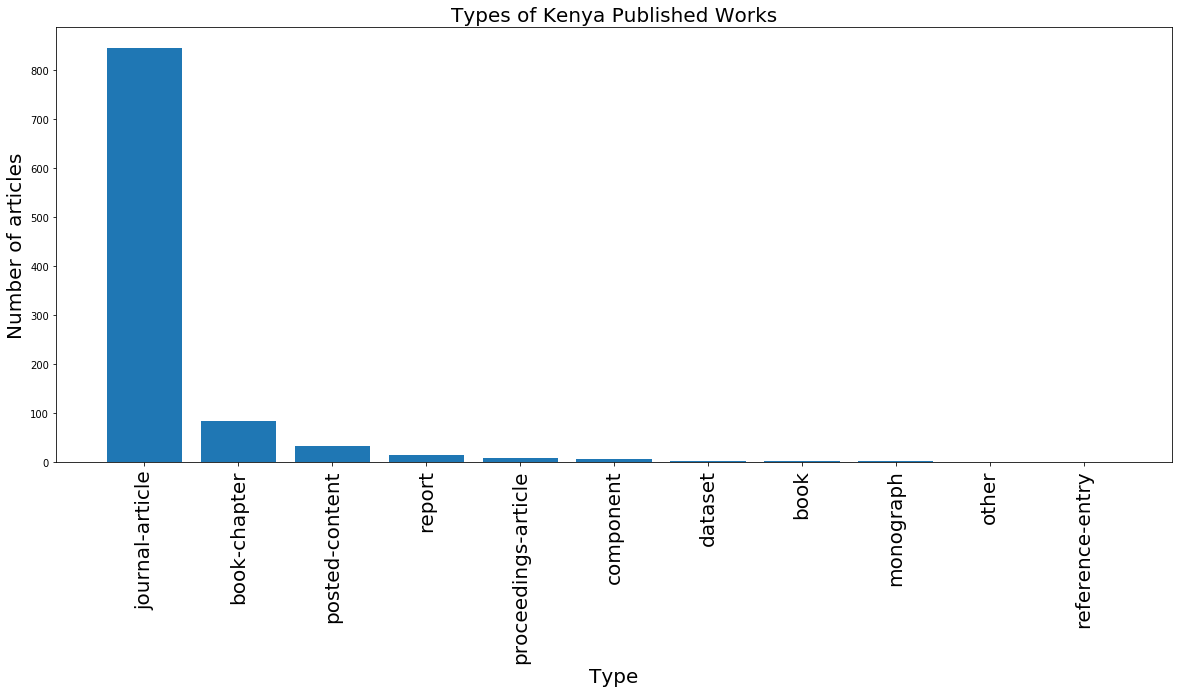

In [45]:
# types

plt.figure(figsize=(20,8)) # set figure size

# create bar plot with publishers and counts
plt.bar(sorted_kenya_type_counts['type'], sorted_kenya_type_counts['count']) 

# rotate publisher names for readability
plt.xticks(sorted_kenya_type_counts['type'], rotation='vertical', fontsize = 20) 

# labeling
plt.title('Types of Kenya Published Works', fontsize = 20) # set title
plt.xlabel('Type', fontsize = 20) # set x label
plt.ylabel('Number of articles', fontsize = 20); # set y label

In [46]:
# language

kenya_lang_counts = kenya_df.groupby('language').count()['indexed'].reset_index()
kenya_lang_counts = kenya_lang_counts.rename({'indexed':'count'}, axis = 1) # rename counts column

sorted_kenya_lang_counts = kenya_lang_counts.sort_values(by='count', ascending = False)
sorted_kenya_lang_counts

,language,count
0,en,630
1,fr,2


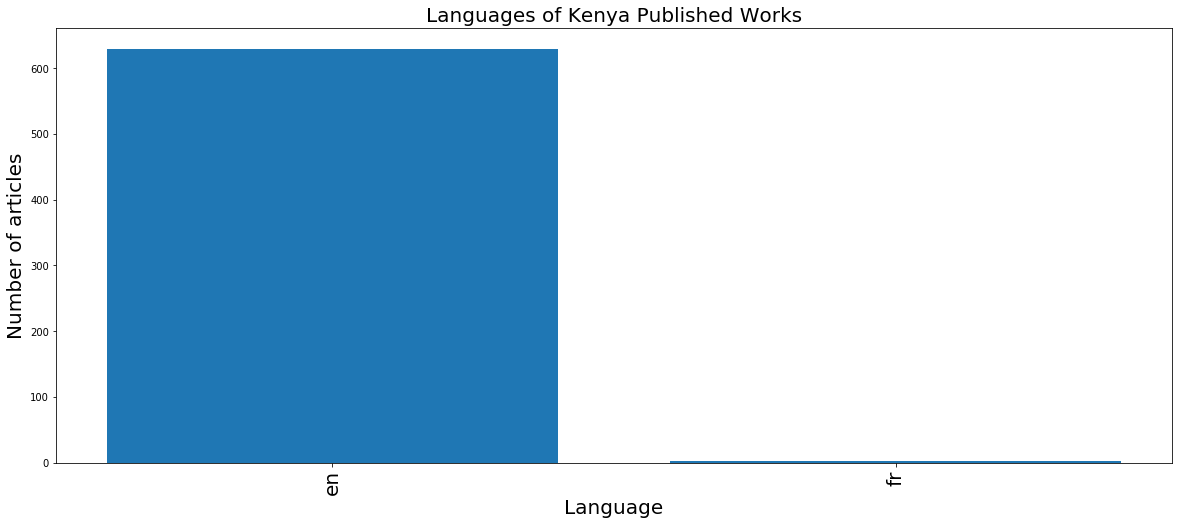

In [47]:
# languages

plt.figure(figsize=(20,8)) # set figure size

# create bar plot with publishers and counts
plt.bar(sorted_kenya_lang_counts['language'], sorted_kenya_lang_counts['count']) 

# rotate publisher names for readability
plt.xticks(sorted_kenya_lang_counts['language'], rotation='vertical', fontsize = 20) 

# labeling
plt.title('Languages of Kenya Published Works', fontsize = 20) # set title
plt.xlabel('Language', fontsize = 20) # set x label
plt.ylabel('Number of articles', fontsize = 20); # set y label

In [48]:
# journal title

kenya_journal_counts = kenya_df.groupby('journal-title').count()['indexed'].reset_index()
kenya_journal_counts = kenya_journal_counts.rename({'indexed':'count'}, axis = 1) # rename counts column

sorted_kenya_journal_counts = kenya_journal_counts.sort_values(by='count', ascending = False)
sorted_kenya_journal_counts

,journal-title,count
365,Mediterranean Journal of Social Sciences,44
227,Innovations as Key to the Green Revolution in ...,43
298,Journal of Educational and Social Research,20
467,The American Journal of Tropical Medicine and ...,18
380,PLOS ONE,12
...,...,...
197,Geo: Geography and Environment,1
196,Genetic Resources and Crop Evolution,1
195,"Gender, Place & Culture",1
193,Frontiers in Public Health,1


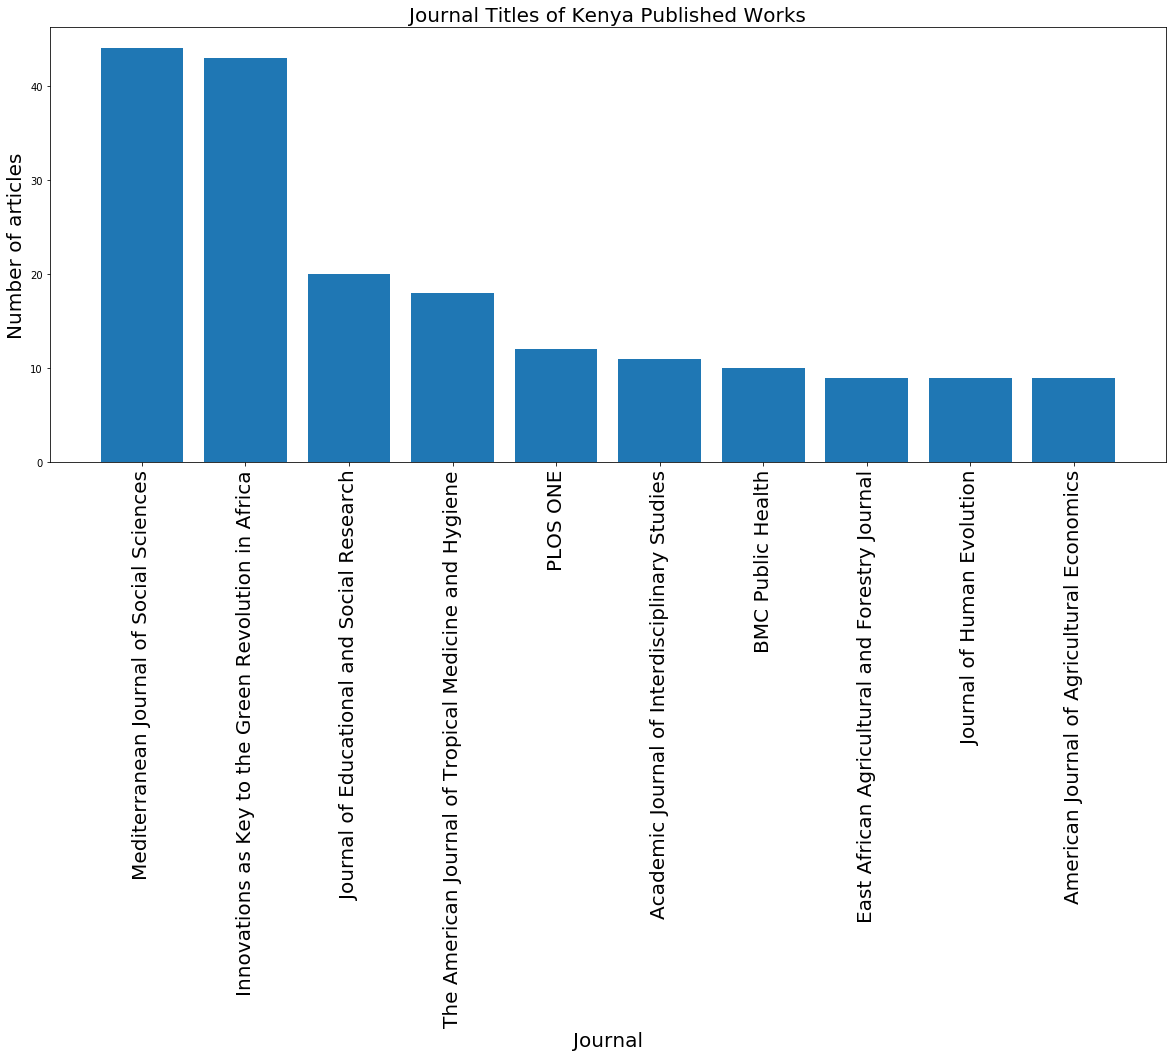

In [49]:
# journal title

kenya_journals_top10 = sorted_kenya_journal_counts.head(10)

plt.figure(figsize=(20,8)) # set figure size

# create bar plot with publishers and counts
plt.bar(kenya_journals_top10['journal-title'], kenya_journals_top10['count']) 

# rotate publisher names for readability
plt.xticks(kenya_journals_top10['journal-title'], rotation='vertical', fontsize = 20) 

# labeling
plt.title('Journal Titles of Kenya Published Works', fontsize = 20) # set title
plt.xlabel('Journal', fontsize = 20) # set x label
plt.ylabel('Number of articles', fontsize = 20); # set y label

If you'd like, you can use the cell below to create bar charts of `publisher`, `language`, `type`, or `journal-title` for your own query by grouping and sorting your `query_df` dataframe! Feel free to reference the cells above for an example with `kenya_df`.

In [ ]:
# your code here

# 3.3 Citations <a id = '3.3'></a>
In scientific literature, we are often also interested in the number of references a journal article has, or the number of times the article was cited. Let's see which articles have been cited the most - we can do this by sorting our dataframe by the `is-referenced-by-count` column. Our dataframe has 45 columns, but we'll just focus on a few. We'll look at the `title`, `is-referenced-by-count`, `publisher`, and `published-print` (the date it was published in print).

In [50]:
most_cited = kenya_df.sort_values('is-referenced-by-count', ascending=False)
most_cited = most_cited[['title', 'is-referenced-by-count', 'publisher', 'published-print']]
most_cited

,title,is-referenced-by-count,publisher,published-print
365,[The decline in paediatric malaria admissions ...,168,Springer Science and Business Media LLC,"{'date-parts': [[2007, 12]]}"
235,[Morphology of Australopithecus anamensis from...,167,Elsevier BV,"{'date-parts': [[2001, 10]]}"
708,[Crustal structure in Ethiopia and Kenya from ...,128,American Geophysical Union (AGU),{'date-parts': [[2005]]}
739,[The contributions of emissions and spatial mi...,115,Environmental Health Perspectives,"{'date-parts': [[2000, 9]]}"
833,[The opportunity costs of biodiversity conserv...,109,Elsevier BV,"{'date-parts': [[1995, 2]]}"
...,...,...,...,...
85,[Stability Analysis in a Mathematical Model of...,0,Sciencedomain International,NaN
634,[Occurrence of antibiotics residues in hospita...,0,Springer Science and Business Media LLC,"{'date-parts': [[2020, 1]]}"
633,[“Stories we tell”: queer narratives in Kenya],0,Informa UK Limited,"{'date-parts': [[2019, 9, 2]]}"
632,[Influence of Performance Appraisal on Motivat...,0,Center for Promoting Ideas,{'date-parts': [[2019]]}


Let's look at the top 10 most cited articles.

In [51]:
most_cited.head(10)

,title,is-referenced-by-count,publisher,published-print
365,[The decline in paediatric malaria admissions ...,168,Springer Science and Business Media LLC,"{'date-parts': [[2007, 12]]}"
235,[Morphology of Australopithecus anamensis from...,167,Elsevier BV,"{'date-parts': [[2001, 10]]}"
708,[Crustal structure in Ethiopia and Kenya from ...,128,American Geophysical Union (AGU),{'date-parts': [[2005]]}
739,[The contributions of emissions and spatial mi...,115,Environmental Health Perspectives,"{'date-parts': [[2000, 9]]}"
833,[The opportunity costs of biodiversity conserv...,109,Elsevier BV,"{'date-parts': [[1995, 2]]}"
645,[Engineered therapeutic antibodies with improv...,108,Wiley,"{'date-parts': [[2009, 9]]}"
944,[Permethrin-impregnated bednet effects on rest...,108,Wiley,"{'date-parts': [[1998, 1]]}"
236,"[Paleosols, stable carbon isotopes, and paleoe...",106,Elsevier BV,"{'date-parts': [[2000, 10]]}"
88,[Transport Costs and Smallholder Cropping Choi...,105,Wiley,"{'date-parts': [[1998, 2]]}"
502,[Smallholder market participation under transa...,103,Elsevier BV,"{'date-parts': [[2008, 8]]}"


**What is the most cited article, and when was it published? Do you think the publishing date has an effect on the number of times the article was referenced?** 

*Replace this line with your answer*

## Visualizing the Number of Citations
When looking at our `most_cited` table, we can see that the most number of times an article was referenced was 208, and the least was 0. Using a type of visualization called a histogram, we can look at the distribution of time an article was referenced. We'll do this in the cell below.

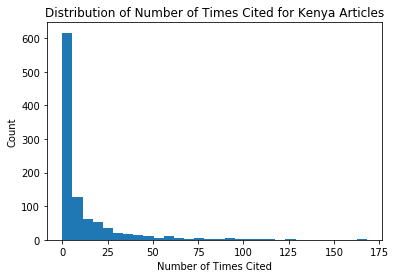

In [52]:
plt.hist(most_cited['is-referenced-by-count'], bins = 30) # generate histogram

# labeling
plt.title('Distribution of Number of Times Cited for Kenya Articles') # set title
plt.xlabel('Number of Times Cited') # set x label
plt.ylabel('Count'); # set y label

We can see that this histogram is very skewed, with the majority of articles being cited fewer than 50 times. We can adjust the bins in order to see a better distribution, by specifying the sizes of the bins.

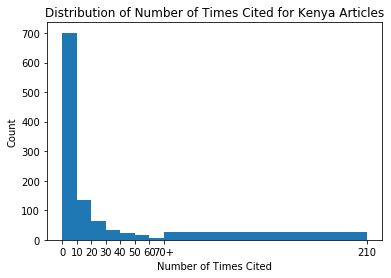

In [53]:
plt.hist(most_cited['is-referenced-by-count'], bins = [0, 10, 20, 30, 40, 50,60, 70, 210]) # generate histogram

# labeling
plt.title('Distribution of Number of Times Cited for Kenya Articles') # set title
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 210], [0, 10, 20, 30, 40, 50, 60, '70+', 210]) # set x axis tickmarks
plt.xlabel('Number of Times Cited') # set x label
plt.ylabel('Count'); # set y label

In the cell below, we've provided code to at the number of times each article was cited for your `query_df`. In the following cell, try applying what you've just used to find the most cited article, the date it was published, and create a histogram showing the distribution for all articles.

In [54]:
most_cited_query = query_df.sort_values('is-referenced-by-count', ascending=False)
most_cited_query = most_cited_query[['title', 'is-referenced-by-count', 'publisher', 'published-print']]
most_cited_query

,title,is-referenced-by-count,publisher,published-print
592,[The Registry Of The International Society For...,250,Elsevier BV,"{'date-parts': [[2002, 9]]}"
631,[Delineation of the Extent of Coronary Atheros...,194,Massachusetts Medical Society,"{'date-parts': [[1987, 2, 5]]}"
788,[http://www.3ieimpact.org/en/publications/3ie-...,135,International Initiative for Impact Evaluation...,"{'date-parts': [[2018, 3]]}"
526,[Comparative analysis of late floral developme...,123,Wiley,"{'date-parts': [[2002, 1]]}"
477,[Potentials and limitations of the natural ant...,123,Elsevier BV,"{'date-parts': [[1998, 11]]}"
...,...,...,...,...
464,[Made You Look: Reflecting on the Trump Electi...,0,NaN,NaN
465,[For Girls Made of Fire],0,NaN,NaN
466,[Designing an Intervention to Promote Critical...,0,NaN,NaN
467,[Curbing Ignorance and Apathy (Across the Poli...,0,NaN,NaN


In [ ]:
# fill in the ...

plt.hist(...['is-referenced-by-count'], bins = ...) # generate histogram

# labeling
plt.title('...') # set title
plt.xlabel('...') # set x label
plt.ylabel('...'); # set y label

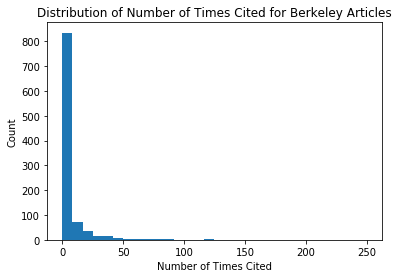

In [55]:
# example

plt.hist(most_cited_query['is-referenced-by-count'], bins = 30) # generate histogram

# labeling
plt.title('Distribution of Number of Times Cited for Berkeley Articles') # set title
plt.xlabel('Number of Times Cited') # set x label
plt.ylabel('Count'); # set y label

# 3.4 Queries Over Time <a id = '3.4'></a>
For our last visualization, we will look at 2 queries over time. To expand our searches to 2 words, we will look at queries for **permafrost melt** and **glacier melt**, and look at the number of articles that were published by year. Since running queries takes a long time, and ideally we want to have more years to compare over time, we pre-ran the queries and saved the results into a csv which we'll load in the cell below.

The following 4 cells show the code we used to generate the csv files. It takes about 10 minutes to run the cells, so you can just skip over them.

In [108]:
cr_permafrost = cr.works(query="permafrost melt", cursor = "*", cursor_max = 5000, progress_bar = True)

100%|████████████████████████████████████████████████████████████████████████████████| 249/249 [05:34<00:00,  1.34s/it]


In [109]:
permafrost_items = [k['message']['items'] for k in cr_permafrost] # get items for all pages
permafrost_items = [item for sublist in permafrost_items for item in sublist] # restructure list
permafrost_df = pd.DataFrame(permafrost_items) # add to dataframe
permafrost_df.to_csv('permafrost_melt_5000.csv') # save to csv

In [112]:
cr_glacier = cr.works(query="glacier melt", cursor = "*", cursor_max = 5000, progress_bar = True)

100%|████████████████████████████████████████████████████████████████████████████████| 249/249 [05:12<00:00,  1.26s/it]


In [113]:
glacier_items = [k['message']['items'] for k in cr_glacier] # get items for all pages
glacier_items = [item for sublist in glacier_items for item in sublist] # restructure list
glacier_df = pd.DataFrame(glacier_items) # add to dataframe
glacier_df.to_csv('glacier_melt_5000.csv') # save to csv

Below, we'll load in our query data and extract the year from the `created` column. Since we read in our data from a csv, our `created` column got converted to strings instead of dictionaries. We use the function `ast.literal_eval()` in order to convert the string back to a dictionary, and then access the year by indexing into `date-parts`.

In [56]:
glacier_df = pd.read_csv('glacier_melt_5000.csv')
permafrost_df = pd.read_csv('permafrost_melt_5000.csv')

In [57]:
glacier_years = [ast.literal_eval(k)['date-parts'][0][0] for k in glacier_df['created']] # extract year
permafrost_years = [ast.literal_eval(k)['date-parts'][0][0] for k in permafrost_df['created']] # extract year

In the cell below, we create a plot comparing the number of articles published for glacier melt and for permafrost melt per year. For `year_counts_glacier` and `year_counts_permafrost`, we use the python package `Counter` to return the counts of articles for each year. We sort by year so that our plot follows sequentially.

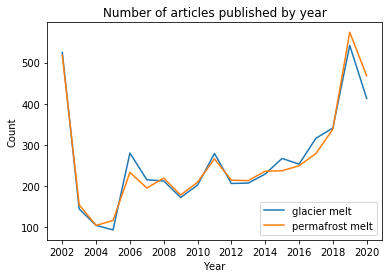

In [59]:
year_counts_glacier = dict(sorted((Counter(glacier_years)).items())) # create dictionary of glacier year counts
year_counts_permafrost = dict(sorted((Counter(permafrost_years)).items())) # create dictionary of permafrost year counts
plt.plot(list(year_counts_glacier.keys()),list(year_counts_glacier.values()), label = 'glacier melt')
plt.plot(list(year_counts_permafrost.keys()),list(year_counts_permafrost.values()), label = 'permafrost melt')
plt.xticks(np.arange(2002, 2021, 2), np.arange(2002, 2021, 2))
plt.title('Number of articles published by year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend();

We can see that the number of articles published each year is about the same for permafrost melt and glacier melt. If you are interested, you could repeat the process of getting queries and edit the above code to compare two search terms that you are interested about.

# 4. Conclusion <a id = '4'></a>
That's it! Thanks for working through this notebook, and we hope you learned a bit more about how we can use python and Jupyter Notebooks in order to analyze academic journal entries. We did this through using the service Crossref, and the python package `habanero` which gives us acces to the Crossref API. We hope that you enjoyed this notebook!

# Bibliography <a id = '5'></a>
- Paul Oldham - Adapted Crossref R guide to Python. https://poldham.github.io/abs/crossref.html#introduction

---

Notebook developed by: Keilyn Yuzuki, Anjali Unnithan

Data Science Modules: http://data.berkeley.edu/education/modules

Data Science Offerings at Berkeley: https://data.berkeley.edu/academics/undergraduate-programs/data-science-offerings